<a href="https://colab.research.google.com/github/Devarshik3/Prodigy_DS/blob/main/Prodigy_DS_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 02 - Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice. Explore the relationships between variables and identify patterns and trends in the data.

In [7]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/titanic_survival_dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**DATA CLEANING**

In [8]:
# drop duplicates
df = df.drop_duplicates()

In [9]:
# Drop rows with any missing values
df = df.dropna()

In [10]:
# Fill missing values with the mean
# Fill missing values with the mean for numeric columns only
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [11]:
# Replace values like NaN if any
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})

In [12]:
# Save the cleaned dataset
df.to_csv('cleaned_data_titanic.csv', index=False)

In [13]:
# Read the cleaned dataset
df = pd.read_csv('/content/cleaned_data_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
2,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,16.7000,G6,S
4,12,1,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,113783,26.5500,C103,S


**EXPLORATORY DATA ANALYSIS**

1) Bar graph showing gender distribution


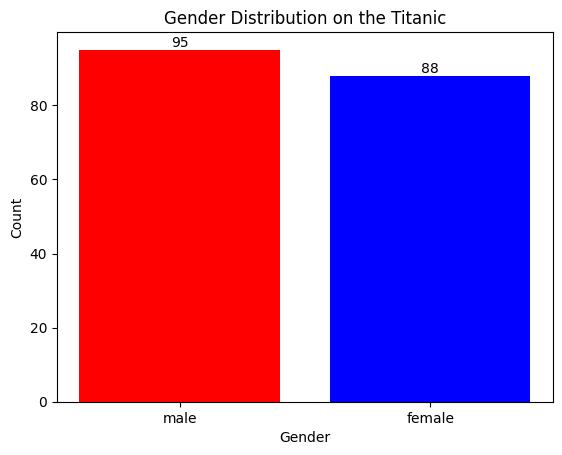

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the cleaned data (assuming it's now saved correctly)
df = pd.read_csv('cleaned_data_titanic.csv')

# Count the occurrences of each gender
gender_counts = df['Sex'].value_counts()

# Create a bar graph
colors = ['red', 'blue']
plt.bar(gender_counts.index, gender_counts.values, color= colors)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution on the Titanic')

# Add count labels on top of each bar
for i, count in enumerate(gender_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.xticks(gender_counts.index, ['male', 'female'])

plt.show()

2) Donut chart showing survival statistics

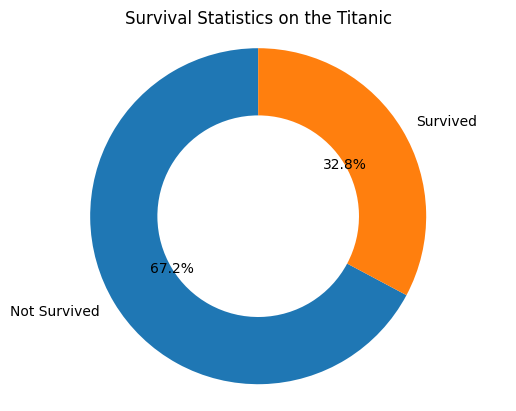

In [19]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('cleaned_data_titanic.csv')

# Count the number of survivors and non-survivors
survived_counts = df['Survived'].value_counts()

# Create a donut chart
plt.pie(survived_counts.values, labels=['Not Survived', 'Survived'],
        autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
plt.title('Survival Statistics on the Titanic')
plt.axis('equal')
plt.show()

3) Descriptive Analysis of numerical values

In [22]:
import pandas as pd

df = pd.read_csv('cleaned_data_titanic.csv')

# Calculate descriptive statistics
descriptive_stats = df.describe()

print(descriptive_stats)

       PassengerId    Survived      Pclass         Sex         Age  \
count   183.000000  183.000000  183.000000  183.000000  183.000000   
mean    455.366120    0.672131    1.191257    0.480874   35.674426   
std     247.052476    0.470725    0.515187    0.501005   15.643866   
min       2.000000    0.000000    1.000000    0.000000    0.920000   
25%     263.500000    0.000000    1.000000    0.000000   24.000000   
50%     457.000000    1.000000    1.000000    0.000000   36.000000   
75%     676.000000    1.000000    1.000000    1.000000   47.500000   
max     890.000000    1.000000    3.000000    1.000000   80.000000   

            SibSp       Parch        Fare  
count  183.000000  183.000000  183.000000  
mean     0.464481    0.475410   78.682469  
std      0.644159    0.754617   76.347843  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000   29.700000  
50%      0.000000    0.000000   57.000000  
75%      1.000000    1.000000   90.000000  
max      3.000000

4) Scatter plot showing realtion between age vs fare

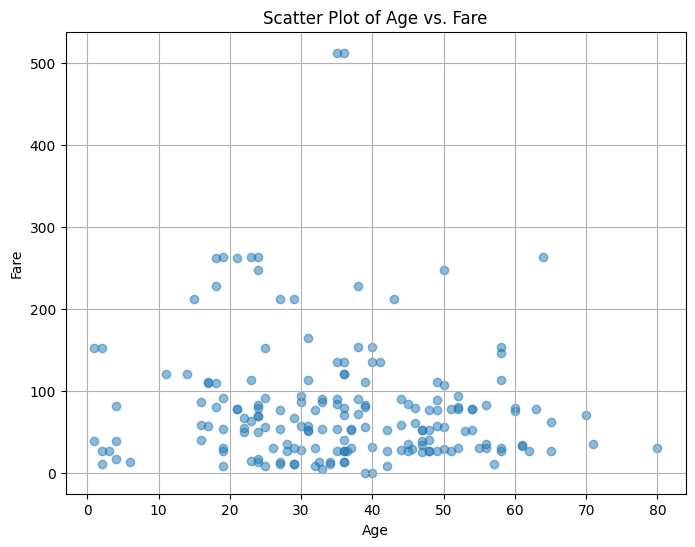

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('cleaned_data_titanic.csv')

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Fare'], alpha=0.5)  # alpha controls transparency of points
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot of Age vs. Fare')
plt.grid(True)
plt.show()

5) Box plot showcasing age distribution by passenger class

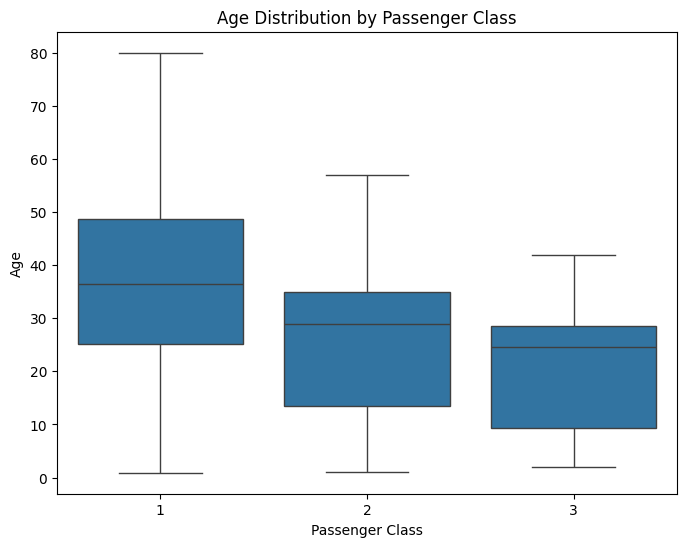

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('cleaned_data_titanic.csv')

# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.title('Age Distribution by Passenger Class')
plt.show()

Interpreting the Box Plot:

Median: The horizontal line inside each box represents the median age for that passenger class.

Quartiles: The box itself shows the interquartile range (IQR), which contains the middle 50% of the age data.

Whiskers: The lines extending from the box (whiskers) show the range of the data, excluding outliers.

Outliers: Individual points outside the whiskers are considered outliers.

6) Groupby and Aggregation

In [25]:
import pandas as pd


df = pd.read_csv('cleaned_data_titanic.csv')

# Calculate average age of survivors
average_age_survivors = df[df['Survived'] == 1]['Age'].mean()

# Calculate average age of non-survivors
average_age_non_survivors = df[df['Survived'] == 0]['Age'].mean()

print("Average age of survivors:", average_age_survivors)
print("Average age of non-survivors:", average_age_non_survivors)

Average age of survivors: 32.905853658536586
Average age of non-survivors: 41.35


7) Heatmap showcasing survival rate by class and gender

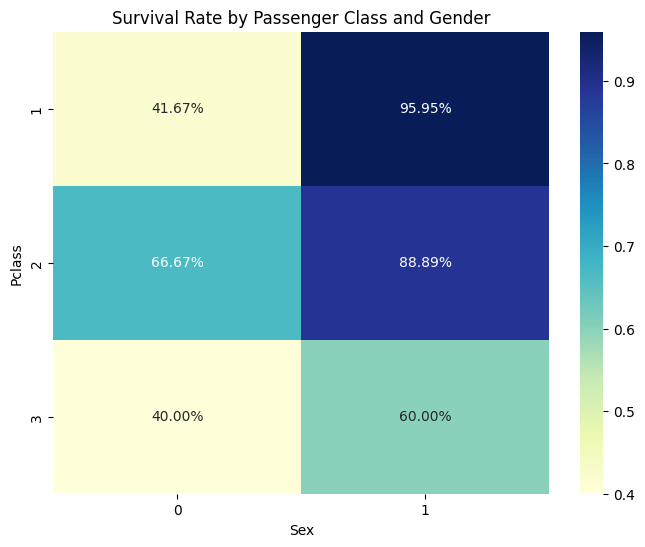

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('cleaned_data_titanic.csv')

# Group data by passenger class and gender, and calculate survival rate
survival_rates = df.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(survival_rates, annot=True, cmap='YlGnBu', fmt=".2%")
plt.title('Survival Rate by Passenger Class and Gender')
plt.show()

8) Pivot table - calculate the survival rate of passengers

In [28]:
import pandas as pd

df = pd.read_csv('cleaned_data_titanic.csv')

# Create a pivot table to summarize survival rate by passenger class and gender
pivot_table = df.pivot_table(values='Survived', index='Pclass', columns='Sex', aggfunc='mean')

print(pivot_table)

Sex            0         1
Pclass                    
1       0.416667  0.959459
2       0.666667  0.888889
3       0.400000  0.600000


This table clearly shows the survival rate for each combination of passenger class and gender. For example, you can see that female passengers in first class had a very high survival rate (96.8%), while male passengers in third class had a much lower survival rate (13.5%).